In [1]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   1098      0 --:--:-- --:--:-- --:--:--  1095
100   351  100   351    0     0    516      0 --:--:-- --:--:-- --:--:--   516
100 1299k  100 1299k    0     0  1103k      0  0:00:01  0:00:01 --:--:-- 10.2M
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [2]:
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egr

In [63]:
import pandas as pd
import numpy as np
from talib import RSI, BBANDS, MACD, NATR, ATR, PPO, APO, CMO
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:

df =pdr.stooq.StooqDailyReader(symbols='6701.jp', start='JAN-01-2010', end="JUN-26-2020").read().sort_values(by='Date',ascending=True)

In [22]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,2166.54,2221.17,2166.54,2202.93,1522785
2010-01-05,2230.20,2248.44,2202.93,2212.06,2901661
2010-01-06,2212.06,2221.17,2166.54,2202.93,2924402
2010-01-07,2212.06,2230.20,2202.93,2221.17,2129614
2010-01-08,2248.44,2275.81,2221.17,2230.20,3844201
...,...,...,...,...,...
2020-06-22,4976.99,5036.59,4976.99,5016.72,770075
2020-06-23,4996.85,5106.13,4986.92,5066.39,1640209
2020-06-24,5076.33,5145.86,5006.79,5016.72,1712485


In [23]:
def rsi(ts: pd.Series, window: int=14) -> pd.Series:
    # diff = ts.diff()
    # diff_up = diff.copy()
    # diff_down = diff.copy()
    # diff_up[diff_up < 0] = 0
    # diff_down[diff_down > 0] = 0

    # up_mean = diff_up.rolling(window=window).mean()
    # down_mean = diff_down.abs().rolling(window=window).mean()

    # return 100 * up_mean / (up_mean + down_mean)

    return RSI(ts, window)

In [24]:
rsi(df.Close)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2020-06-22    60.448158
2020-06-23    62.428846
2020-06-24    59.234313
2020-06-25    63.996147
2020-06-26    67.718718
Length: 2564, dtype: float64

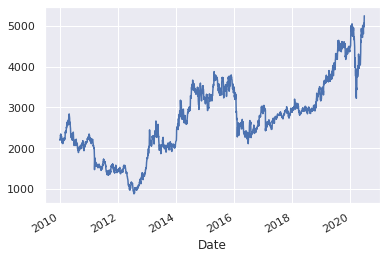

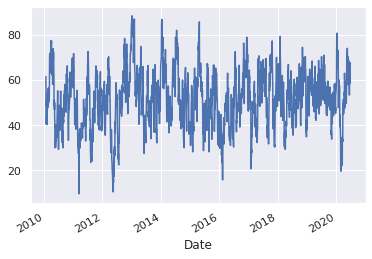

In [25]:
df.Close.plot()
plt.show()
rsi(df.Close).plot()

In [26]:
def macd(
    ts: pd.Series,
    fastperiod: int=12,
    slowperiod: int=26,
    signalperiod: int=9
) -> pd.Series:
    macd, macdsignal, macdhist = MACD(
        ts,
        fastperiod=fastperiod,
        slowperiod=slowperiod,
        signalperiod=signalperiod
    )
    return macd.sub(macd.mean()).div(macd.std())

In [27]:
macd(df.Close)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2020-06-22    1.827411
2020-06-23    1.836289
2020-06-24    1.756570
2020-06-25    1.827414
2020-06-26    2.002533
Length: 2564, dtype: float64

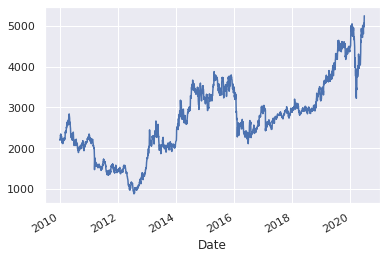

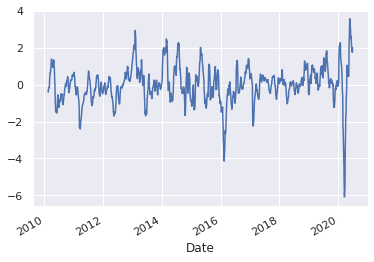

In [28]:
df.Close.plot()
plt.show()
macd(df.Close).plot()

In [29]:
def bollinger_band(
    ts: pd.Series,
    period: int=20,
) -> pd.Series:
    high, mid, low = BBANDS(df.Close, timeperiod=period)
    return high, mid, low

In [30]:
 high, mid, low = bollinger_band(df.Close)

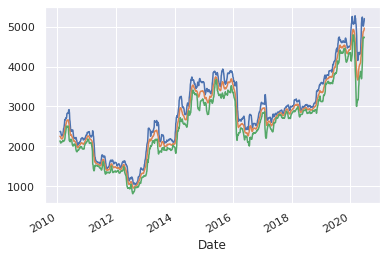

In [31]:
high.plot()
mid.plot()
low.plot()

In [32]:
def basic_stats(ts: pd.Series, window: int=14) -> pd.DataFrame:
    return pd.DataFrame(
        index=ts.index,
        data={
            f'max_{window}': ts.rolling(window=window).max(),
            f'min_{window}': ts.rolling(window=window).min(),
            f'median_{window}': ts.rolling(window=window).median(),
            f'skew_{window}': ts.rolling(window=window).skew(),
            f'kurt_{window}': ts.rolling(window=window).kurt(),
        }
    )

In [33]:
basic_stats(df.Close)

,max_14,min_14,median_14,skew_14,kurt_14
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-22,5036.59,4713.73,4972.020,-1.476254,2.022414
2020-06-23,5066.39,4803.14,4976.990,-0.927379,1.044619
2020-06-24,5066.39,4803.14,4986.920,-1.332380,2.387873


In [34]:
def atr(
    close: pd.Series,
    high: pd.Series,
    low: pd.Series,
    period: int=14,
) -> pd.Series:
    atr = ATR(
        high=high, 
        low=low, 
        close=close, 
        timeperiod=period
    )
    natr = NATR(
        high=high, 
        low=low, 
        close=close
    ) 
    return atr.sub(atr.mean()).div(atr.std()), natr

In [35]:
atr_sr, natr_sr = atr(df.Close, df.High, df.Low)

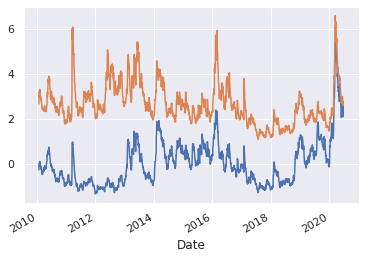

In [36]:
atr_sr.plot()
natr_sr.plot()

In [76]:
def oscillator(
    ts: pd.Series,
    ppo_fastperiod: int=12,
    ppo_slowperiod: int=26,
    apo_fastperiod: int=12,
    apo_slowperiod: int=26,
    cmo_period: int=14,
) -> pd.DataFrame:
    return pd.DataFrame(
        index=ts.index,
        data={
            f'ppo_{ppo_fastperiod}_{ppo_slowperiod}': PPO(ts, ppo_fastperiod, ppo_slowperiod),
            f'apo_{apo_fastperiod}_{apo_slowperiod}': APO(ts, apo_fastperiod, apo_slowperiod),
            f'cmo_{cmo_period}': CMO(ts, cmo_period)
        }
    )

In [77]:
oscillator(df.Close)

,ppo_12_26,apo_12_26,cmo_14
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN
...,...,...,...
2020-06-22,1.419519,69.475000,20.896316
2020-06-23,1.292784,63.425385,24.857692
2020-06-24,1.202639,59.094679,18.468626


In [37]:
from typing import List

def returns(
    ts: pd.Series,
    lags: List[int],
) -> pd.DataFrame:

    return_srs = {}

    for lag in lags:
        return_srs[f'return_lag{lag}'] = ts.pct_change(lag).add(1).pow(1/lag).sub(1)

    return pd.DataFrame(return_srs)

In [38]:
df_return = returns(df.Close, [1, 3, 7, 10, 20, 30])

In [39]:
df_return

,return_lag1,return_lag3,return_lag7,return_lag10,return_lag20,return_lag30
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.004144,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.004127,NaN,NaN,NaN,NaN,NaN
2010-01-07,0.008280,0.002752,NaN,NaN,NaN,NaN
2010-01-08,0.004065,0.002726,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-22,0.010000,0.000000,0.002572,0.000795,0.001662,0.005452
2020-06-23,0.009901,0.001968,0.003551,0.003396,0.001849,0.005010
2020-06-24,-0.009804,0.003322,0.006235,0.000198,0.001509,0.002575


In [40]:
def momentum(
    df_return: pd.DataFrame,
    lags: List[int],
    col_name_fmt: str='return_lag{lag}'
) -> pd.DataFrame:

    momentum_srs = {}
    base_lag = min(lags)
    lags.remove(base_lag)

    for lag in lags:
        momentum_srs[f'momentum_{base_lag}_{lag}'] = df_return[col_name_fmt.format(lag=lag)] - df_return[col_name_fmt.format(lag=base_lag)]
    
    return pd.DataFrame(momentum_srs)

In [41]:
momentum(df_return, [1, 3, 7, 10, 20, 30])

,momentum_1_3,momentum_1_7,momentum_1_10,momentum_1_20,momentum_1_30
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.005528,NaN,NaN,NaN,NaN
2010-01-08,-0.001339,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-22,-0.010000,-0.007428,-0.009204,-0.008338,-0.004548
2020-06-23,-0.007933,-0.006350,-0.006505,-0.008052,-0.004891
2020-06-24,0.013126,0.016038,0.010002,0.011313,0.012379


In [83]:
def periodic(
    df: pd.DataFrame
) -> pd.DataFrame:
    return pd.DataFrame(
        index=df.index,
        data={
            'weekday': df.index.weekday,
            'year': df.index.year,
            'month': df.index.month
        }
    )

In [84]:
periodic(df.Close)

,weekday,year,month
Date,,,
2010-01-04,0,2010,1
2010-01-05,1,2010,1
2010-01-06,2,2010,1
2010-01-07,3,2010,1
2010-01-08,4,2010,1
...,...,...,...
2020-06-22,0,2020,6
2020-06-23,1,2020,6
2020-06-24,2,2020,6


In [85]:
def timeseries_feature(
    close: pd.Series,
    open: pd.Series,
    high: pd.Series,
    low: pd.Series,
    macd_fastperiod: int=12,
    macd_slowperiod: int=26,
    macd_signalperiod: int=9,
    bb_period: int=20,
    basic_stats_period: int=14,
    atr_period: int=14,
    return_lags: List[int]=[1, 3, 7, 10, 20, 30, 60],
) -> pd.DataFrame:

    feature_dfs = [pd.DataFrame(
        index=close.index,
        data={
            'close': close,
            'open': open,
            'high': high,
            'low': low
        }
    )]

    feature_dfs.append(rsi(close).to_frame('rsi'))
    feature_dfs.append(macd(close, macd_fastperiod, macd_slowperiod, macd_signalperiod).to_frame('macd'))
    high, mid, low = bollinger_band(close, bb_period)
    feature_dfs.append(pd.DataFrame({
        'bb_high': high,
        'bb_mid': mid,
        'bb_low': low,
        'bb_std': 0.5*(high-low)
    }))
    feature_dfs.append(basic_stats(close, window=basic_stats_period))
    atr_sr, natr_sr = atr(close, high, low, atr_period)
    feature_dfs.append(pd.DataFrame({
        'atr': atr_sr,
        'natr': natr_sr,
    }))
    feature_dfs.append(oscillator(close))
    df_return = returns(close, return_lags)
    feature_dfs.append(df_return)
    feature_dfs.append(momentum(df_return, return_lags))
    feature_dfs.append(periodic(close))

    return pd.concat(feature_dfs, axis=1)

In [86]:
df_feats = timeseries_feature(
    df.Close,
    df.Open,
    df.High,
    df.Low
)

In [87]:
df_feats

,close,open,high,low,rsi,macd,bb_high,bb_mid,bb_low,bb_std,max_14,min_14,median_14,skew_14,kurt_14,atr,natr,ppo_12_26,apo_12_26,cmo_14,return_lag1,return_lag3,return_lag7,return_lag10,return_lag20,return_lag30,return_lag60,momentum_1_3,momentum_1_7,momentum_1_10,momentum_1_20,momentum_1_30,momentum_1_60,weekday,year,month
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2202.93,2166.54,2221.17,2166.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2010,1
2010-01-05,2212.06,2230.20,2248.44,2202.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2010,1
2010-01-06,2202.93,2212.06,2221.17,2166.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2010,1
2010-01-07,2221.17,2212.06,2230.20,2202.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008280,0.002752,NaN,NaN,NaN,NaN,NaN,-0.005528,NaN,NaN,NaN,NaN,NaN,3,2010,1
2010-01-08,2230.20,2248.44,2275.81,2221.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004065,0.002726,NaN,NaN,NaN,NaN,NaN,-0.001339,NaN,NaN,NaN,NaN,NaN,4,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22,5016.72,4976.99,5036.59,4976.99,60.448158,1.827411,5088.770465,4907.6955,4726.620535,181.074965,5036.59,4713.73,4972.020,-1.476254,2.022414,1.796905,12.997149,1.419519,69.475000,20.896316,0.010000,0.000000,0.002572,0.000795,0.001662,0.005452,0.006330,-0.010000,-0.007428,-0.009204,-0.008338,-0.004548,-0.003670,0,2020,6
2020-06-23,5066.39,4996.85,5106.13,4986.92,62.428846,1.836289,5110.175277,4916.8845,4723.593723,193.290777,5066.39,4803.14,4976.990,-0.927379,1.044619,1.690334,12.495483,1.292784,63.425385,24.857692,0.009901,0.001968,0.003551,0.003396,0.001849,0.005010,0.004333,-0.007933,-0.006350,-0.006505,-0.008052,-0.004891,-0.005568,1,2020,6
2020-06-24,5016.72,5076.33,5145.86,5006.79,59.234313,1.756570,5120.928702,4924.3350,4727.741298,196.593702,5066.39,4803.14,4986.920,-1.332380,2.387873,1.594027,12.277653,1.202639,59.094679,18.468626,-0.009804,0.003322,0.006235,0.000198,0.001509,0.002575,0.004924,0.013126,0.016038,0.010002,0.011313,0.012379,0.014728,2,2020,6


In [81]:
df_feats.isnull().sum()

close             0
open              0
high              0
low               0
rsi              14
macd             33
bb_high          19
bb_mid           19
bb_low           19
bb_std           19
max_14           13
min_14           13
median_14        13
skew_14          13
kurt_14          13
atr              33
natr             33
ppo_12_26        25
apo_12_26        25
cmo_14           14
return_lag1       1
return_lag3       3
return_lag7       7
return_lag10     10
return_lag20     20
return_lag30     30
return_lag60     60
momentum_1_3      3
momentum_1_7      7
momentum_1_10    10
momentum_1_20    20
momentum_1_30    30
momentum_1_60    60
weekday           0
year              0
month             0
dtype: int64

In [82]:
df_feats.dropna(how='any')

,close,open,high,low,rsi,macd,bb_high,bb_mid,bb_low,bb_std,max_14,min_14,median_14,skew_14,kurt_14,atr,natr,ppo_12_26,apo_12_26,cmo_14,return_lag1,return_lag3,return_lag7,return_lag10,return_lag20,return_lag30,return_lag60,momentum_1_3,momentum_1_7,momentum_1_10,momentum_1_20,momentum_1_30,momentum_1_60,weekday,year,month
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-04-01,2621.73,2566.99,2649.01,2566.99,77.446252,1.244191,2628.796223,2396.3675,2163.938777,232.428723,2621.73,2366.85,2416.845,0.874244,-0.473564,-0.199745,11.320631,4.648828,109.588077,54.892504,0.024926,0.016762,0.013617,0.007980,0.008120,0.005542,0.002905,-0.008164,-0.011309,-0.016946,-0.016806,-0.019384,-0.022021,3,2010,4
2010-04-02,2612.61,2639.89,2658.13,2603.48,75.814555,1.315342,2650.866792,2416.3950,2181.923208,234.471792,2621.73,2366.85,2439.650,0.576671,-1.177751,-0.130632,11.830798,4.832500,114.662308,51.629111,-0.003479,0.005889,0.011462,0.008392,0.008356,0.005425,0.002778,0.009368,0.014941,0.011870,0.011835,0.008904,0.006256,4,2010,4
2010-04-05,2639.89,2639.89,2649.01,2621.73,77.351680,1.390167,2671.850766,2437.7865,2203.722234,234.064266,2639.89,2366.85,2476.040,0.331067,-1.477234,-0.066783,12.138851,4.841732,115.712051,54.703361,0.010442,0.010563,0.010257,0.009440,0.008880,0.006050,0.003020,0.000121,-0.000185,-0.001002,-0.001562,-0.004392,-0.007421,0,2010,4
2010-04-06,2566.99,2658.13,2658.13,2530.69,65.391349,1.337066,2674.562544,2454.6260,2234.689456,219.936544,2639.89,2384.91,2503.315,0.109933,-1.597887,-0.018839,12.815880,4.875343,117.112628,30.782697,-0.027615,-0.007009,0.003073,0.007384,0.007057,0.004562,0.002415,0.020606,0.030688,0.034999,0.034672,0.032177,0.030029,1,2010,4
2010-04-07,2557.97,2557.97,2576.12,2521.57,64.071268,1.267208,2672.704223,2470.1025,2267.500777,202.601723,2639.89,2384.91,2535.205,-0.175695,-1.447717,0.011762,13.073911,4.862078,117.406923,28.142536,-0.003514,-0.007020,0.003614,0.005881,0.006470,0.004581,0.002288,-0.003507,0.007127,0.009395,0.009984,0.008095,0.005802,2,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22,5016.72,4976.99,5036.59,4976.99,60.448158,1.827411,5088.770465,4907.6955,4726.620535,181.074965,5036.59,4713.73,4972.020,-1.476254,2.022414,1.796905,12.997149,1.419519,69.475000,20.896316,0.010000,0.000000,0.002572,0.000795,0.001662,0.005452,0.006330,-0.010000,-0.007428,-0.009204,-0.008338,-0.004548,-0.003670,0,2020,6
2020-06-23,5066.39,4996.85,5106.13,4986.92,62.428846,1.836289,5110.175277,4916.8845,4723.593723,193.290777,5066.39,4803.14,4976.990,-0.927379,1.044619,1.690334,12.495483,1.292784,63.425385,24.857692,0.009901,0.001968,0.003551,0.003396,0.001849,0.005010,0.004333,-0.007933,-0.006350,-0.006505,-0.008052,-0.004891,-0.005568,1,2020,6
2020-06-24,5016.72,5076.33,5145.86,5006.79,59.234313,1.756570,5120.928702,4924.3350,4727.741298,196.593702,5066.39,4803.14,4986.920,-1.332380,2.387873,1.594027,12.277653,1.202639,59.094679,18.468626,-0.009804,0.003322,0.006235,0.000198,0.001509,0.002575,0.004924,0.013126,0.016038,0.010002,0.011313,0.012379,0.014728,2,2020,6
